In [41]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

In [42]:
dim  = 2 # dimensions (x, y)
nums = 1000 # number of steps
R    = np.zeros(dim)
V    = np.zeros(dim)
Rs   = np.zeros([dim, nums]) # particle position at all steps
Vs   = np.zeros([dim, nums]) # particle velocity at all steps
Et   = np.zeros(nums) # total energy of the system at all steps
time = np.zeros(nums) # time at all steps

In [43]:
def init(): # initializes the animation
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles, line, title
"""def animate(i): # define the animation using Euler's Method
    global R, V, Rs, Vs, time, Et # Where did the F come from?
    R, V = R+V*dt, V*(1-zeta/m*dt)-k/m*dt*R # By Euler's method
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0, 0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f}, E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles, line, title"""
"""R1 = np.zeros(dim)
def animate(i): # define animation
    global R, V, Rs, Vs, time, Et, R1
    R1 = R
    V = (V*(1-zeta/2/m*dt)-k/m*dt*R)/(1+zeta*dt/2/m) # Leap-Frog method
    R = R + V*dt
    Rs[0:dim, i] = R
    Vs[0:dim, i] = V
    time[i] = i*dt
    Et[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm((R+R1)/2)**2 # Et is evauluated
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0, 0:i], Rs[1, 0:i]) # add latest position Rs
    title.set_text(r'$t = {0:.2f}, E_T = {1:.3f}$'.format(i*dt, Et[i]))
    return particles, line, title"""
R1 = np.zeros(dim)
def animate(i): # define animation # for anharmonic spring
    global R, V, Rs, Vs, time, Et, R1
    R1 = R
    V = (V*(1-zeta/2/m*dt)-k/m*dt*R)/(1-zeta*dt/2/m) 
    R = R + V*dt
    Rs[0:dim, i] = R
    Vs[0:dim, i] = V
    time[i] = i*dt
    Et[i] = 0.5*m*np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm((R+R1)/2)**2 # Et is evauluated
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0, 0:i], Rs[1, 0:i]) # add latest position Rs
    title.set_text(r'$t = {0:.2f}, E_T = {1:.3f}$'.format(i*dt, Et[i]))
    return particles, line, title

<IPython.core.display.Javascript object>


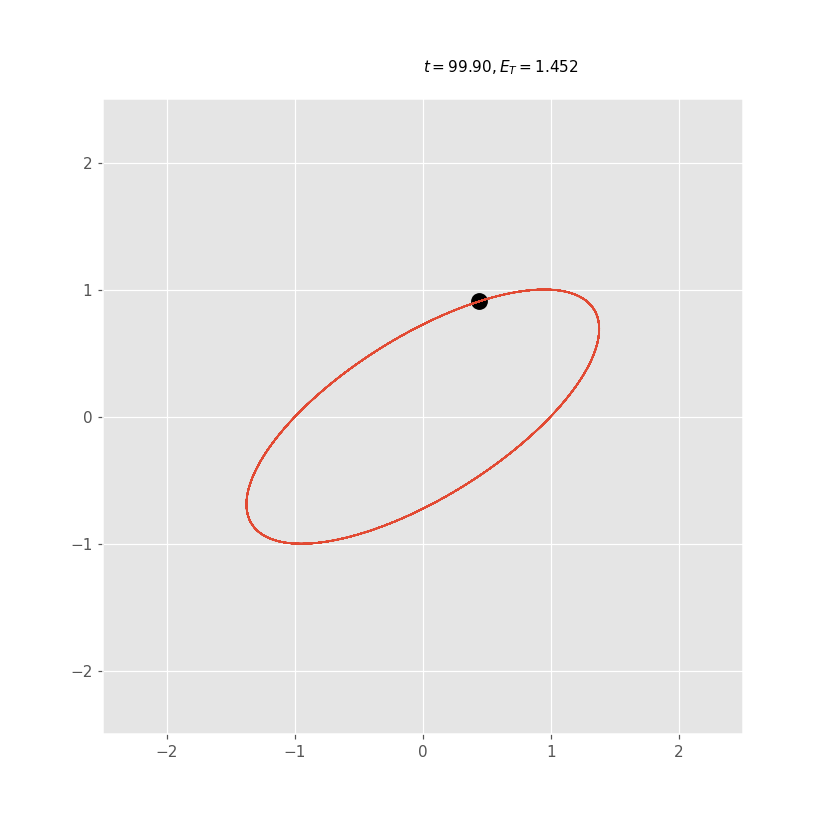

In [44]:
# System parameters
# particle mass, spring & friction constants
m, k, zeta = 1.0, 1.0, 0.0 # zeta = 0.25, 0.1, 0.0 for Euler, Leap_Frog, anharmonic spring
# Initial conditions
R[0], R[1] = 1., 1. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
dt  = 0.1*np.sqrt(k/m) # set \Delta t
box = 5 # set size of draw area
# set up the figure, axis, and plot element for animation
fig, ax = plt.subplots(figsize=(7.5,7.5)) # setup plot
ax = plt.axes(xlim=(-box/2, box/2), ylim=(-box/2, box/2)) # draw range
particles, = ax.plot([], [], 'ko', ms=10) # setup plot for particle
line, = ax.plot([], [], lw=1) # set up plot for trajectory
title = ax.text(0.5, 1.05, r'', transform=ax.transAxes, va='center') 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nums, interval=5, blit=True, repeat=False) #draw animation
# anim.save('movie.mp4', fps=20, dpi=400)

<IPython.core.display.Javascript object>


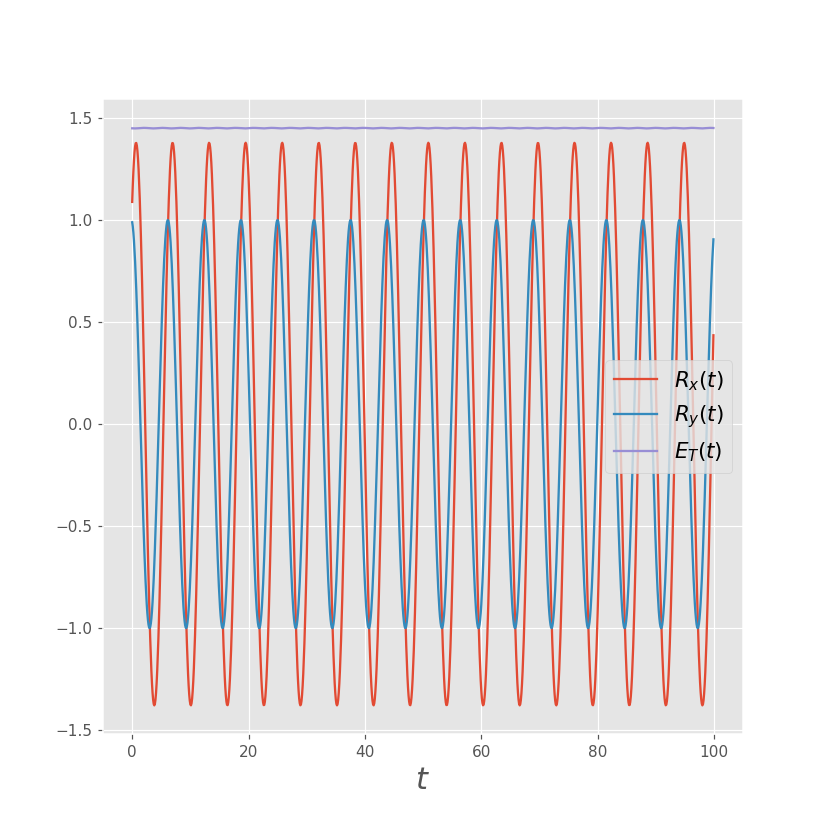

In [45]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time, Rs[0]) # R_x(t)
ax.plot(time, Rs[1]) # R_y(t)
ax.plot(time, Et) # plot E(t)
ax.legend([r"$R_x(t)$", r'$R_y(t)$', r'$E_T(t)$'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


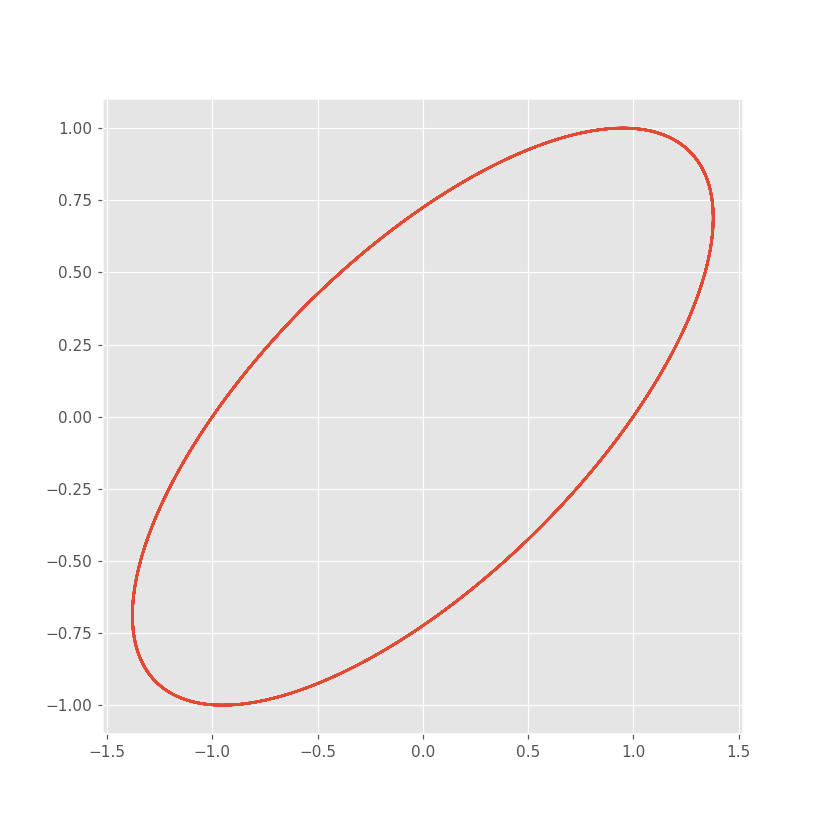

In [46]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.plot(Rs[0, 0:nums], Rs[1, 0:nums]) # parametric plot Rx(t) vs. Ry(t)
plt.show()